In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from Utils.Lower_closedset import pos_traj,pos_traj_up
from Utils.invariant import computing_invariant2,computing_invariant,computing_invariant3
from Utils.feasibility import is_feasible_rk4_case2,is_feasible_rk4_case1
from Utils.solving_equation import RK4
from Utils.Lower_closedset import pos_traj,pos_traj_up
from Utils.utils import sampling_stepfunction,piecewise_step_function, step_function

In [3]:
A = 4.425
H = 30
a = 0.476
K1 = 4.6
K2 = 2
u_min = 0
u_max = 22
w_min = -20
w_max = 0
g = 980
X_matrix = - np.eye(2)*(a*np.sqrt(2*g))/A
X_matrix[1, 0] = (a*np.sqrt(2*g))/A
U_matrix = np.array([[K1, 0],[0, K2]])/A
w_matrix = np.array([0,1])/A
#DYNAMICS 
def f(x, u,w): 
    k = np.sqrt(x)
    h = np.matmul(X_matrix, k) + np.matmul(U_matrix, u) + w_matrix.T*w
    return h
#INDICATOR OF STATE CONSTRAINTS
def g(x): 
    return ((x[0]<= 30 and x[1] <= 20)) and (x[0]>=0 and x[1]>=0)
#eNFORCING sOME SYSTEMS HARD CONSTRAINTS
proj = lambda x : np.where(x < 0, 0 , x) 
T = 50
h = 5.0
x_0 = np.array([30, 20])
N_step = 10
N_euler = 1000
#CHECKING FOR FEASIBLE POINTS
u = lambda t: step_function(t,h,[np.array([u_min, u_min])])
w = lambda t: step_function(t,h,[w_max])
print(is_feasible_rk4_case2(x_0,u, w, T, N_euler*N_step, f, g, proj = proj))

([array([30, 20]), array([29.8697193 , 20.02375952])], [0.0], 0)


In [4]:
def f(x, u,w): 
    k = np.sqrt(x)
    h = np.matmul(X_matrix, k) + np.matmul(U_matrix, u) + w_matrix.T*w
    return h
def g(x): 
    return ((x[0]<= 30 and x[1] <= 20)) and (x[0]>=0 and x[1]>=0)
proj = lambda x : np.where(x < 0, 0 , x) 
T = 25
h = 5.


$\epsilon = 1 $

In [ ]:
epsilon = 1  
x_0 = np.array([30, 20])


In [5]:
%%timeit -n 10
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

28.4 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%%timeit -n 10
Traj = computing_invariant(g, f, np.array([0,0]), 0, epsilon, np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

1.49 s ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%%timeit -n 10
Traj_feas1, Traj_unsafe1, Traj_safe2 = computing_invariant3(g, f, np.array([0,0]), np.array([22,22]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = 2*T, N_euler = 1000 , proj= proj)

175 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
Traj = computing_invariant(g, f, np.array([0,0]), 0, epsilon, np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)
Traj_feas1, Traj_unsafe1, Traj_safe2 = computing_invariant3(g, f, np.array([0,0]), np.array([22,22]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = 2*T, N_euler = 1000 , proj= proj)
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]),0, epsilon , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

In [11]:
[traj[0] for traj in Traj]

[array([20., 20.]), array([29., 19.]), array([30., 18.])]

In [12]:
[traj[0][0] for traj in Traj_feas]

[array([20., 20.]), array([29., 19.]), array([30., 18.])]

In [13]:
[traj[0][0] for traj in Traj_feas1]

[array([20., 20.]), array([29., 19.]), array([30., 18.])]

## All 3 methods gaves the same results

In [37]:
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([Y[i,j], X[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([Y[i,j], X[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

In [65]:
?Rectangle

In [99]:
color = ['#1F77B4', '#FE8213', '#2CA02C']

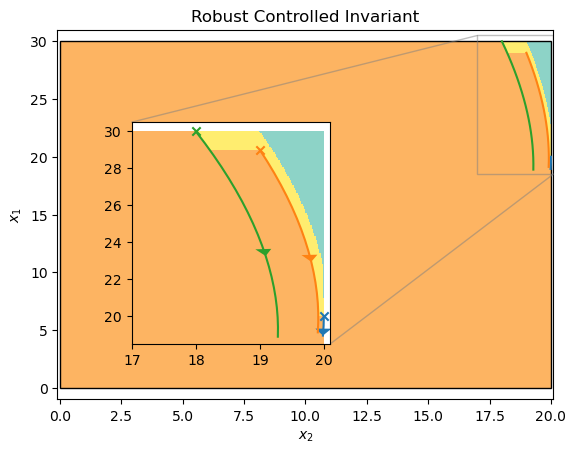

In [100]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title('Robust Controlled Invariant')
# set the limits of the plot to the limits of the data
ax.axis([x.min()-0.1, x.max()+0.1, x.min()-1, y.max()+1])
ax.add_patch(Rectangle((0, 0), 20, 30, fill = False, edgecolor='k', lw=1))
axins = ax.inset_axes([0.15,0.15,0.4, 0.6])
x1, x2, y1, y2 = 17, 20.1, 18.5, 30.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
c = axins.pcolormesh(X, Y, Z, cmap='Set3_r')
s = 0
for traj in Traj_feas: 
    n = len(traj[0])//2
    x3 = np.array(traj[0])[n,1]
    y3 =  np.array(traj[0])[n,0]
    dx = np.array(traj[0])[n+1,1] - x3
    dy = np.array(traj[0])[n+1,0]-y3
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})', c = color[s])
    axins.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})',c = color[s]) 
    axins.scatter([np.array(traj[0])[0,1]], [np.array(traj[0])[0,0]],marker='x', color = color[s])
    axins.arrow(x3,y3, dx,dy , shape='full', lw=0, length_includes_head=True, head_width= 0.25, color = color[s] )
    s+=1
    
ax.indicate_inset_zoom(axins)
  
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

$\epsilon = 0.5$

In [101]:
epsilon = 0.5  


In [102]:
%%timeit -n 10
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

133 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [103]:
%%timeit -n 10
Traj = computing_invariant(g, f, np.array([0,0]), 0, epsilon, np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

4.85 s ± 384 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [104]:
%%timeit -n 10
Traj_feas1, Traj_unsafe1, Traj_safe2 = computing_invariant3(g, f, np.array([0,0]), np.array([22,22]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = 2*T, N_euler = 1000 , proj= proj)

516 ms ± 8.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
Traj = computing_invariant(g, f, np.array([0,0]), 0, epsilon, np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)
Traj_feas1, Traj_unsafe1, Traj_safe2 = computing_invariant3(g, f, np.array([0,0]), np.array([22,22]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = 2*T, N_euler = 1000 , proj= proj)
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]),0, epsilon , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

In [109]:
[traj[0] for traj in Traj]

[array([20., 20.]),
 array([26.5, 19.5]),
 array([29.5, 19. ]),
 array([30. , 18.5])]

In [119]:
[traj[0][0] for traj in Traj_feas]

[array([20., 20.]),
 array([26.5, 19.5]),
 array([29.5, 19. ]),
 array([30. , 18.5])]

In [111]:
[traj[0][0] for traj in Traj_feas1]

[array([20., 20.]),
 array([26.5, 19.5]),
 array([29.5, 19. ]),
 array([30. , 18.5])]

In [112]:
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([Y[i,j], X[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([Y[i,j], X[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

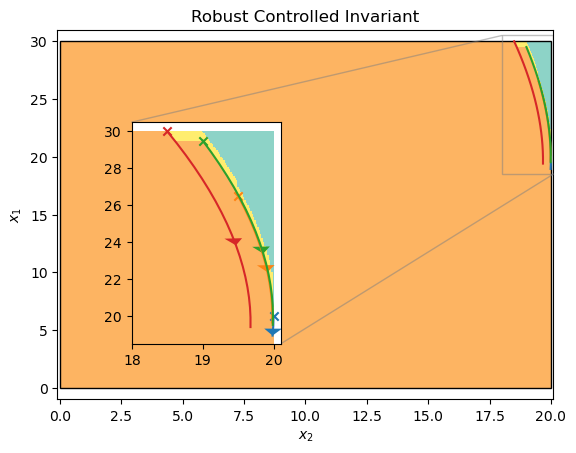

In [118]:
color = ['#1F77B4', '#FE8213', '#2CA02C','#D62728']
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title('Robust Controlled Invariant')
# set the limits of the plot to the limits of the data
ax.axis([x.min()-0.1, x.max()+0.1, x.min()-1, y.max()+1])
ax.add_patch(Rectangle((0, 0), 20, 30, fill = False, edgecolor='k', lw=1))
axins = ax.inset_axes([0.15,0.15,0.3, 0.6])
x1, x2, y1, y2 = 18, 20.1, 18.5, 30.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
c = axins.pcolormesh(X, Y, Z, cmap='Set3_r')
s = 0
for traj in Traj_feas: 
    n = len(traj[0])//2
    x3 = np.array(traj[0])[n,1]
    y3 =  np.array(traj[0])[n,0]
    dx = np.array(traj[0])[n+1,1] - x3
    dy = np.array(traj[0])[n+1,0]-y3
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})', c = color[s])
    axins.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})',c = color[s]) 
    axins.scatter([np.array(traj[0])[0,1]], [np.array(traj[0])[0,0]],marker='x', color = color[s])
    axins.arrow(x3,y3, dx,dy , shape='full', lw=0, length_includes_head=True, head_width= 0.25, color = color[s] )
    s+=1
    
ax.indicate_inset_zoom(axins)
  
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()

# Not included in the paper but an easy test 
$\epsilon = 0.1$

In [120]:
epsilon = 0.1  

In [121]:
%%timeit -n 10
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

12 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
%%timeit -n 10
Traj = computing_invariant(g, f, np.array([0,0]), 0, epsilon, np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

3min 41s ± 6.52 s per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [123]:
%%timeit -n 10
Traj_feas1, Traj_unsafe1, Traj_safe2 = computing_invariant3(g, f, np.array([0,0]), np.array([22,22]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = 2*T, N_euler = 1000 , proj= proj)

50 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [124]:
Traj = computing_invariant(g, f, np.array([0,0]), 0, epsilon, np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)
Traj_feas1, Traj_unsafe1, Traj_safe2 = computing_invariant3(g, f, np.array([0,0]), np.array([22,22]), 0, epsilon , np.array([0,0]),np.array([30,20]), T = 2*T, N_euler = 1000 , proj= proj)
Traj_feas, Traj_unsafe, Traj_safe = computing_invariant2(g, f, np.array([0,0]),0, epsilon , np.array([0,0]),np.array([30,20]), T = T, N_euler = 1000 , proj= proj)

In [125]:
[traj[0] for traj in Traj]

[array([20.2, 20. ]),
 array([22.8, 19.9]),
 array([24.1, 19.8]),
 array([25. , 19.7]),
 array([25.9, 19.6]),
 array([26.6, 19.5]),
 array([27.3, 19.4]),
 array([27.9, 19.3]),
 array([28.4, 19.2]),
 array([29. , 19.1]),
 array([29.5, 19. ]),
 array([30. , 18.9])]

In [126]:
[traj[0][0] for traj in Traj_feas]

[array([20.2, 20. ]),
 array([22.8, 19.9]),
 array([24.1, 19.8]),
 array([25. , 19.7]),
 array([25.9, 19.6]),
 array([26.6, 19.5]),
 array([27.3, 19.4]),
 array([27.9, 19.3]),
 array([28.4, 19.2]),
 array([29. , 19.1]),
 array([29.5, 19. ]),
 array([30. , 18.9])]

In [127]:
[traj[0][0] for traj in Traj_feas1]

[array([20., 20.]),
 array([22.8, 19.9]),
 array([24.1, 19.8]),
 array([25. , 19.7]),
 array([25.9, 19.6]),
 array([26.6, 19.5]),
 array([27.2, 19.4]),
 array([27.9, 19.3]),
 array([28.4, 19.2]),
 array([29. , 19.1]),
 array([29.5, 19. ]),
 array([30. , 18.9])]

In [ ]:
x = np.linspace(0,20, 1001)
y = np.linspace(0,30,1001)
X,Y = np.meshgrid(x,y)
Z = X.copy()
for i in range(len(X)):
    for j in range(len(X[0])):
        s = 0
        for traj in Traj_feas: 
            if (pos_traj([Y[i,j], X[i,j]], traj[0])): 
                s = 1
                break
        if s ==0: 
            for traj in Traj_unsafe: 
                if (pos_traj_up([Y[i,j], X[i,j]], traj[0])): 
                    s = 2
                    break
        Z[i,j] = s

In [ ]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z, cmap='Set3_r')
ax.set_title('RCI')
# set the limits of the plot to the limits of the data
ax.axis([x.min()-1, x.max()+1, x.min()-1, y.max()+1])
for traj in Traj_feas: 
    ax.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')

axins = ax.inset_axes([0.1, 0.1, 0.4, 0.4])
x1, x2, y1, y2 = 18.5, 19.5, 22, 31
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
c = axins.pcolormesh(X, Y, Z, cmap='Set3_r')

for traj in Traj_feas: 
    axins.plot(np.array(traj[0])[:,1], np.array(traj[0])[:,0],'-', label = f'({traj[0][0][1]},{traj[0][0][0]})')
ax.indicate_inset_zoom(axins)
 
    
ax.set_xlabel(r"$x_2$")
ax.set_ylabel(r"$x_1$")
plt.show()